#  Measurement of the zero of waveplate
***
* Eder Martioli, LNA 26 Feb 2025

This notebook shows an analysis of the data obtained on the engineering night with SPARC4 to measure the zero of waveplate obtained from observations of a circularized standard star.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib
from uncertainties import ufloat

### Access to the reduced data :
The reduced data presented in this document as well as all reduced data from the engineering night with SPARC4 on Feb 24, 2025, are available for download at [Engineering 20250224](https://drive.google.com/drive/folders/1_bVizkJ1jjyxw4BnAAnbtSKVV1jhNZMl?usp=sharing).

# Circularly polarized standard: WD 1036-204
***
In this section we analyze the circularly polarized standard WD 1036-204

### Load file paths :

In [2]:
s2, s4 = [], []
p2, p4 = [], []
object = 'wd1036-204'
year= '2025'
date = f'{year}0225'

# change path below to the location where the reduced data are saved:
reducedir = f"/media/fernando/KINGSTON/Doutorado/{year}/reduced/{date}"

for ch in range(1,5) :
    s2_filepath = "{}/sparc4acs{}/{}_s4c{}_Gain2_1.0_Conventional_2_{}_POLAR_L2_stack.fits".format(reducedir,ch,date,ch,object)
    s4_filepath = "{}/sparc4acs{}/{}_s4c{}_Gain2_1.0_Conventional_2_{}_POLAR_L4_stack.fits".format(reducedir,ch,date,ch,object)
    p2_filepath = "{}/sparc4acs{}/{}_s4c{}_Gain2_1.0_Conventional_2_{}_POLAR_L2_polar.fits".format(reducedir,ch,date,ch,object)
    p4_filepath = "{}/sparc4acs{}/{}_s4c{}_Gain2_1.0_Conventional_2_{}_POLAR_L4_polar.fits".format(reducedir,ch,date,ch,object)
    s2.append(s2_filepath)
    s4.append(s4_filepath)
    p2.append(p2_filepath)
    p4.append(p4_filepath)

### Plot stack to visually identify target index:

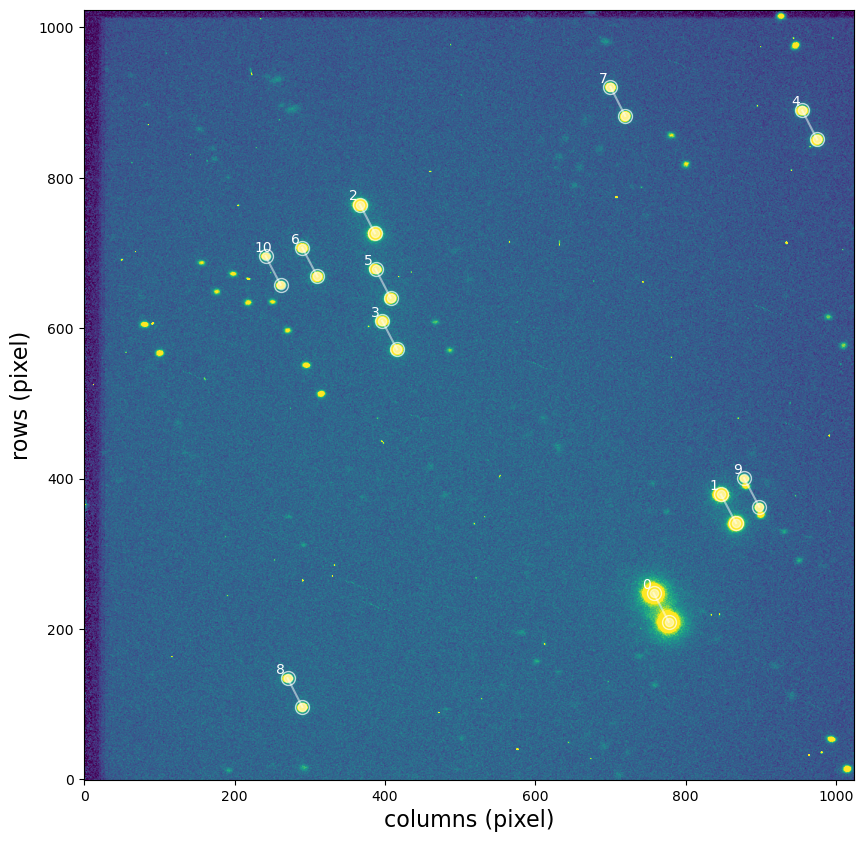

<Figure size 640x480 with 0 Axes>

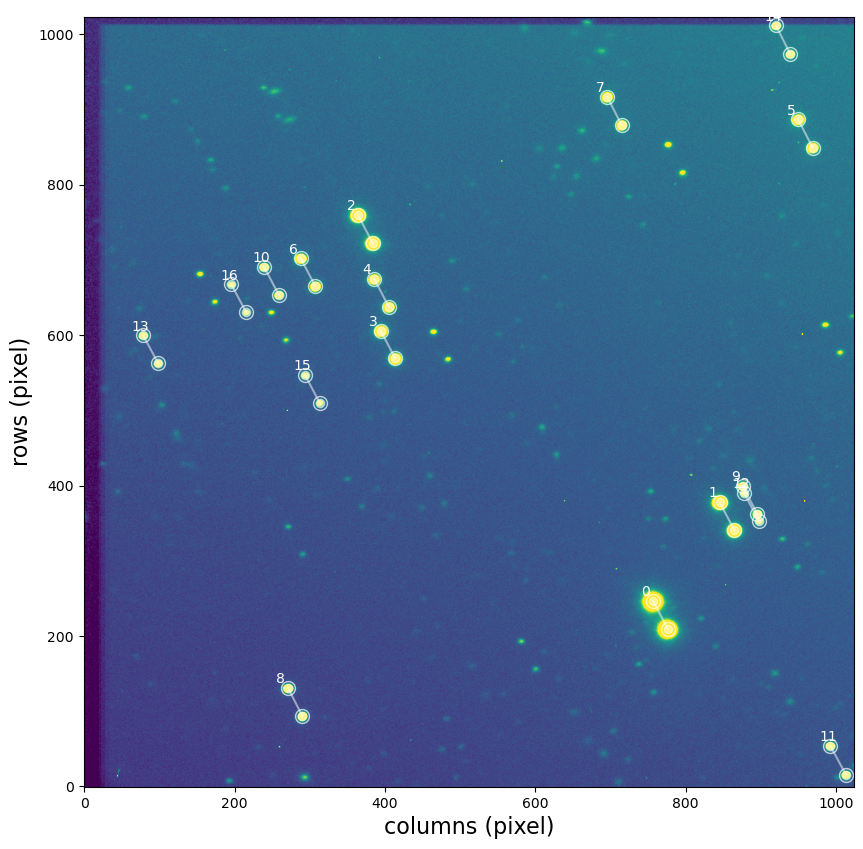

<Figure size 640x480 with 0 Axes>

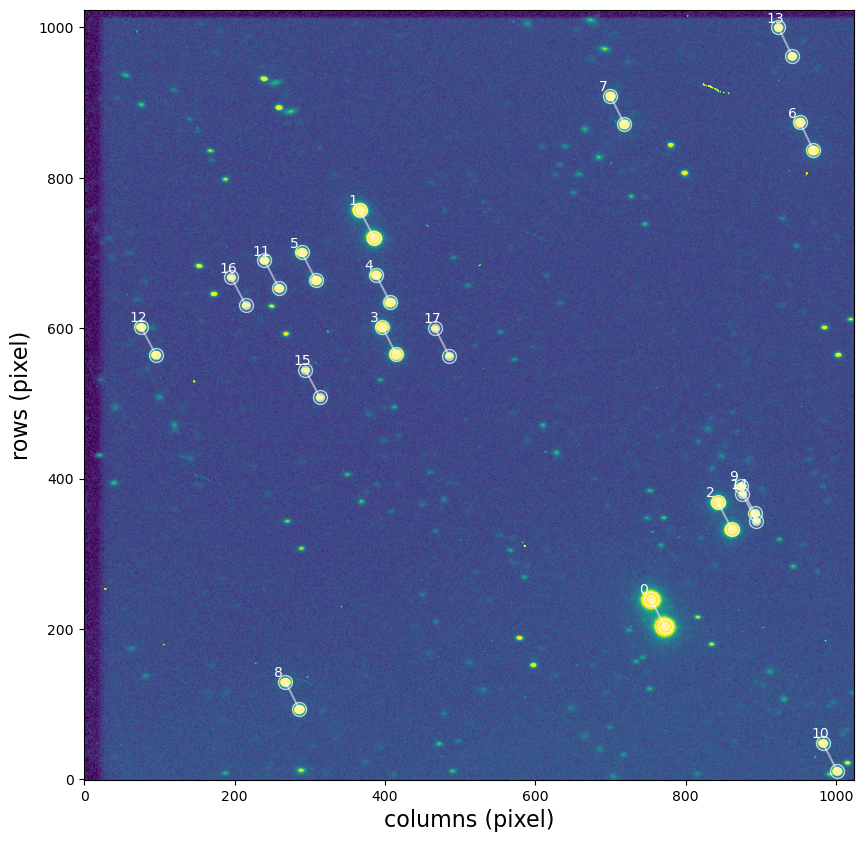

<Figure size 640x480 with 0 Axes>

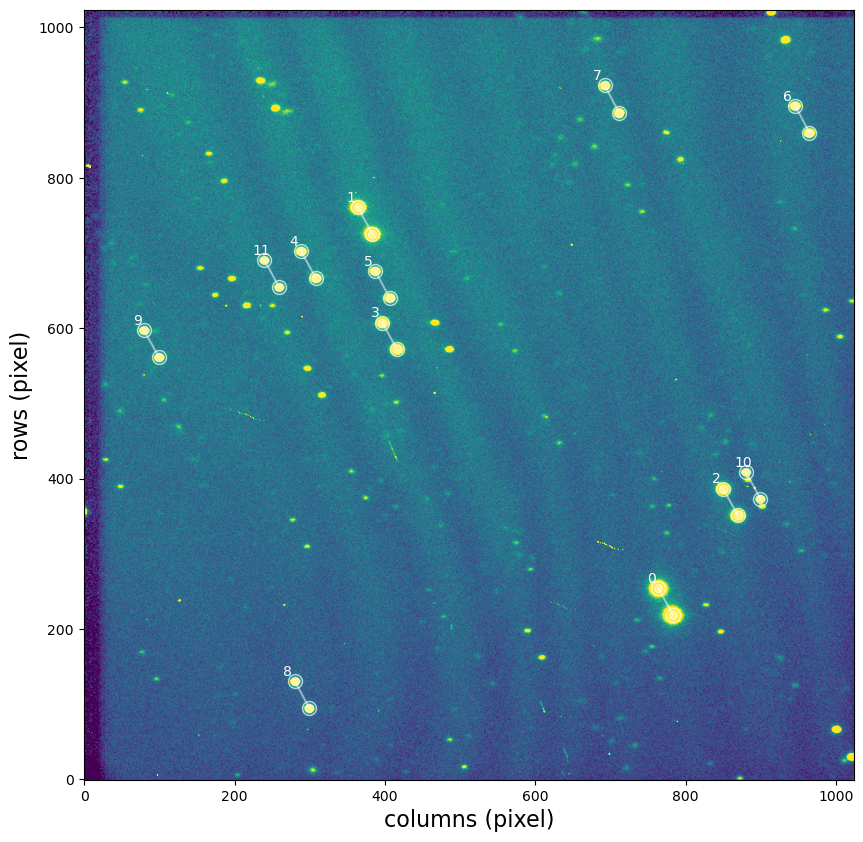

<Figure size 640x480 with 0 Axes>

In [3]:
for i in range(4):
    s4plt.plot_sci_polar_frame(s4[i])
    plt.tight_layout()
    plt.show()

### Set index and make a first plot of the polarimetry:

2025-09-08 15:43:12,667 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-08 15:43:12,667 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-08 15:43:12,671 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-08 15:43:12,671 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-08 15:43:12,874 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-08 15:43:12,874 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-08 15:43:12,879 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-08 15:43:12,879 | INFO | Substituting symbol \perp from STIXGeneral


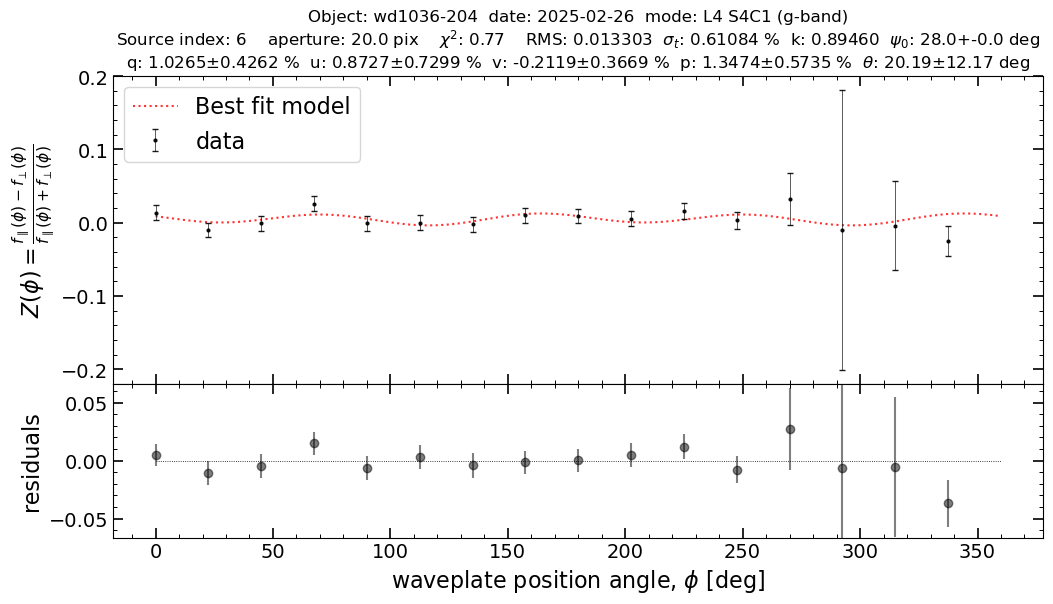

2025-09-08 15:43:13,480 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-08 15:43:13,480 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-08 15:43:13,484 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-08 15:43:13,484 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-08 15:43:13,701 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-08 15:43:13,701 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-08 15:43:13,706 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-08 15:43:13,706 | INFO | Substituting symbol \perp from STIXGeneral


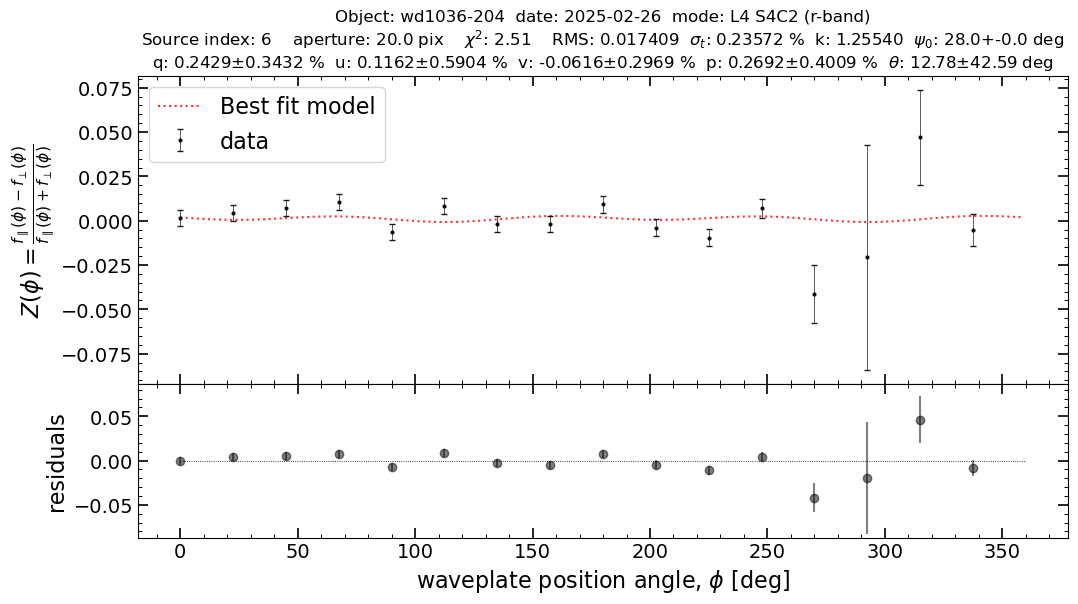

2025-09-08 15:43:14,207 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-08 15:43:14,207 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-08 15:43:14,212 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-08 15:43:14,212 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-08 15:43:14,416 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-08 15:43:14,416 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-08 15:43:14,421 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-08 15:43:14,421 | INFO | Substituting symbol \perp from STIXGeneral


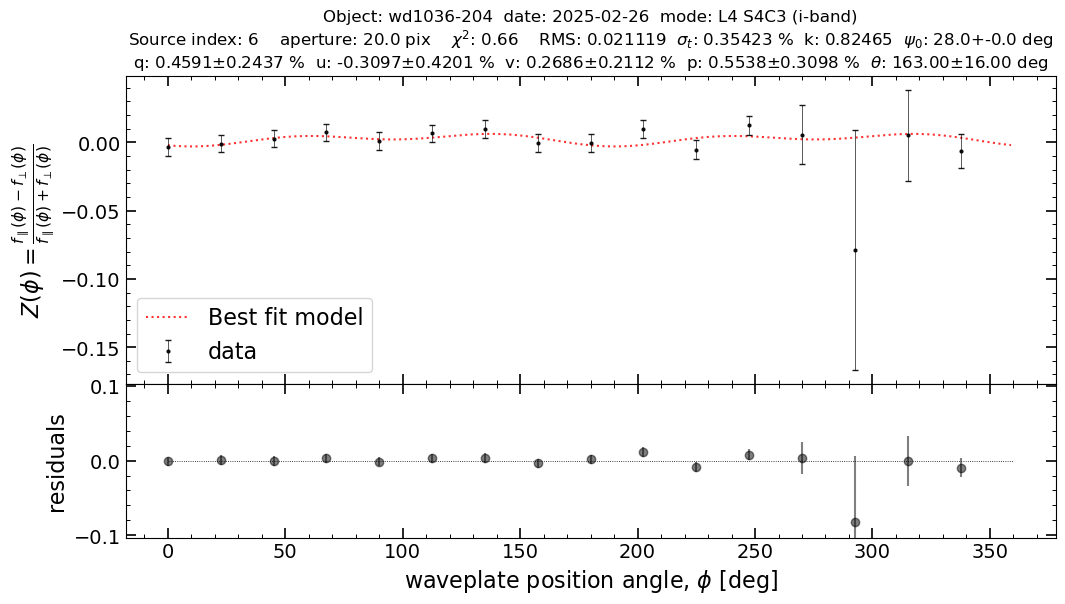

2025-09-08 15:43:14,999 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-08 15:43:14,999 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-08 15:43:15,004 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-08 15:43:15,004 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-08 15:43:15,219 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-08 15:43:15,219 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-08 15:43:15,224 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-08 15:43:15,224 | INFO | Substituting symbol \perp from STIXGeneral


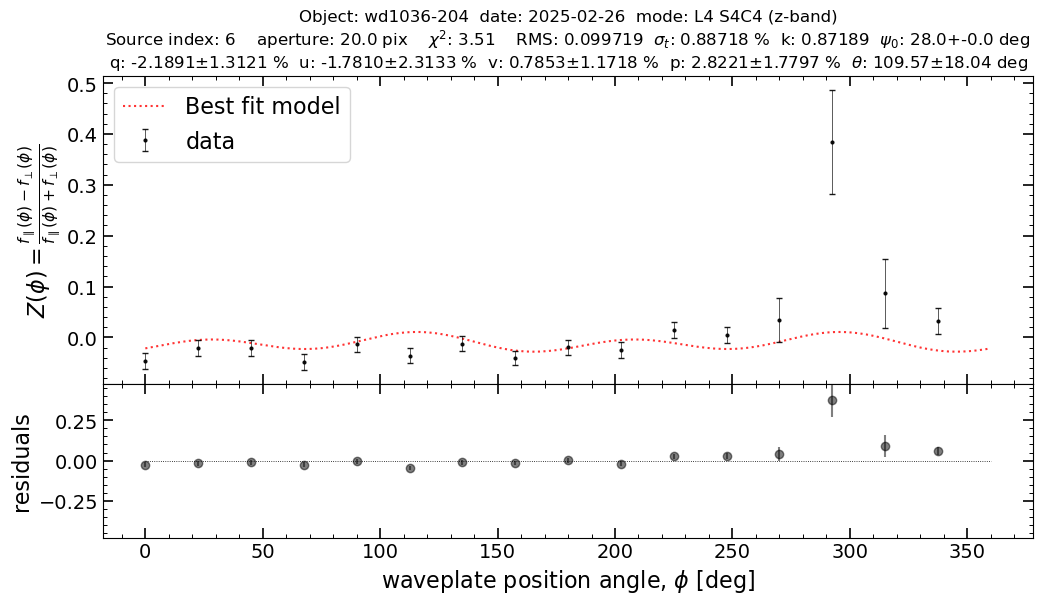

In [15]:
source_index = [6, 6, 6, 6]
min_aperture = 5
max_aperture = 21
zero_guess = 28  # guess for zero, in degrees

for i in range(4):
    pol_results = s4pipelib.get_polarimetry_results(
        p4[i],
        source_index=source_index[i],
        min_aperture=min_aperture,
        max_aperture=max_aperture,
        aperture_radius=20,
        plot=True,
        verbose=False,
        compute_k=True,
        zero=zero_guess)

### Select sampling of trial zeros, and set variables 

In [5]:
zeros = np.arange(90) # set array of trial zeros
mask = zeros < 200 # mask values to avoid double minima when full range is 360 deg
rms = [np.array([]), np.array([]), np.array([]), np.array([])]
chisqr = [np.array([]), np.array([]), np.array([]), np.array([])]
imin = [None, None, None, None]
colors = ["lightblue","darkgreen","darkorange","red"]
bands = ["g","r","i","z"]

### Calculate polarimetry for all trial zeros in the four channels

In [6]:
# the loop may take a few minutes to run
for ch in range(1,5) :    
    for i in range(len(zeros)) :
        pol_results = s4pipelib.get_polarimetry_results(p4[ch-1],
                                                source_index=source_index[ch-1],
                                                min_aperture=min_aperture,
                                                max_aperture=max_aperture,
                                                compute_k=False,
                                                plot=False,
                                                verbose=False,
                                                zero=zeros[i])
        rms[ch-1] = np.append(rms[ch-1],pol_results['RMS'])
        chisqr[ch-1] = np.append(chisqr[ch-1],pol_results['CHI2'])

2025-09-08 15:35:28,483 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:28,483 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-09-08 15:35:29,104 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:29,104 | INFO | Normalization disabled.


2025-09-08 15:35:29,669 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:29,669 | INFO | Normalization disabled.


2025-09-08 15:35:30,270 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:30,270 | INFO | Normalization disabled.


2025-09-08 15:35:30,816 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:30,816 | INFO | Normalization disabled.


2025-09-08 15:35:31,405 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:31,405 | INFO | Normalization disabled.


2025-09-08 15:35:32,010 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:32,010 | INFO | Normalization disabled.


2025-09-08 15:35:32,553 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:32,553 | INFO | Normalization disabled.


2025-09-08 15:35:33,089 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:33,089 | INFO | Normalization disabled.


2025-09-08 15:35:33,666 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:33,666 | INFO | Normalization disabled.


2025-09-08 15:35:34,273 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:34,273 | INFO | Normalization disabled.


2025-09-08 15:35:34,803 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:34,803 | INFO | Normalization disabled.


2025-09-08 15:35:35,380 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:35,380 | INFO | Normalization disabled.


2025-09-08 15:35:35,909 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:35,909 | INFO | Normalization disabled.


2025-09-08 15:35:36,494 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:36,494 | INFO | Normalization disabled.


2025-09-08 15:35:37,024 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:37,024 | INFO | Normalization disabled.


2025-09-08 15:35:37,621 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:37,621 | INFO | Normalization disabled.


2025-09-08 15:35:38,167 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:38,167 | INFO | Normalization disabled.


2025-09-08 15:35:38,771 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:38,771 | INFO | Normalization disabled.


2025-09-08 15:35:39,306 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:39,306 | INFO | Normalization disabled.


2025-09-08 15:35:39,894 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:39,894 | INFO | Normalization disabled.


2025-09-08 15:35:40,442 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:40,442 | INFO | Normalization disabled.


2025-09-08 15:35:41,031 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:41,031 | INFO | Normalization disabled.


2025-09-08 15:35:41,559 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:41,559 | INFO | Normalization disabled.


2025-09-08 15:35:42,141 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:42,141 | INFO | Normalization disabled.


2025-09-08 15:35:42,688 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:42,688 | INFO | Normalization disabled.


2025-09-08 15:35:43,228 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:43,228 | INFO | Normalization disabled.


2025-09-08 15:35:43,799 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:43,799 | INFO | Normalization disabled.


2025-09-08 15:35:44,391 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:44,391 | INFO | Normalization disabled.


2025-09-08 15:35:44,901 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:44,901 | INFO | Normalization disabled.


2025-09-08 15:35:45,474 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:45,474 | INFO | Normalization disabled.


2025-09-08 15:35:45,995 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:45,995 | INFO | Normalization disabled.


2025-09-08 15:35:46,526 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:46,526 | INFO | Normalization disabled.


2025-09-08 15:35:47,094 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:47,094 | INFO | Normalization disabled.


2025-09-08 15:35:47,617 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:47,617 | INFO | Normalization disabled.


2025-09-08 15:35:48,184 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:48,184 | INFO | Normalization disabled.


2025-09-08 15:35:48,757 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:48,757 | INFO | Normalization disabled.


2025-09-08 15:35:49,277 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:49,277 | INFO | Normalization disabled.


2025-09-08 15:35:49,852 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:49,852 | INFO | Normalization disabled.


2025-09-08 15:35:50,380 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:50,380 | INFO | Normalization disabled.


2025-09-08 15:35:50,960 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:50,960 | INFO | Normalization disabled.


2025-09-08 15:35:51,500 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:51,500 | INFO | Normalization disabled.


2025-09-08 15:35:52,084 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:52,084 | INFO | Normalization disabled.


2025-09-08 15:35:52,642 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:52,642 | INFO | Normalization disabled.


2025-09-08 15:35:53,255 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:53,255 | INFO | Normalization disabled.


2025-09-08 15:35:53,792 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:53,792 | INFO | Normalization disabled.


2025-09-08 15:35:54,377 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:54,377 | INFO | Normalization disabled.


2025-09-08 15:35:54,912 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:54,912 | INFO | Normalization disabled.


2025-09-08 15:35:55,510 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:55,510 | INFO | Normalization disabled.


2025-09-08 15:35:56,039 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:56,039 | INFO | Normalization disabled.


2025-09-08 15:35:56,627 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:56,627 | INFO | Normalization disabled.


2025-09-08 15:35:57,165 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:57,165 | INFO | Normalization disabled.


2025-09-08 15:35:57,743 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:57,743 | INFO | Normalization disabled.


2025-09-08 15:35:58,279 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:58,279 | INFO | Normalization disabled.


2025-09-08 15:35:58,863 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:58,863 | INFO | Normalization disabled.


2025-09-08 15:35:59,398 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:59,398 | INFO | Normalization disabled.


2025-09-08 15:35:59,982 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:35:59,982 | INFO | Normalization disabled.


2025-09-08 15:36:00,507 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:00,507 | INFO | Normalization disabled.


2025-09-08 15:36:01,095 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:01,095 | INFO | Normalization disabled.


2025-09-08 15:36:01,624 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:01,624 | INFO | Normalization disabled.


2025-09-08 15:36:02,214 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:02,214 | INFO | Normalization disabled.


2025-09-08 15:36:02,812 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:02,812 | INFO | Normalization disabled.


2025-09-08 15:36:03,353 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:03,353 | INFO | Normalization disabled.


2025-09-08 15:36:03,886 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:03,886 | INFO | Normalization disabled.


2025-09-08 15:36:04,488 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:04,488 | INFO | Normalization disabled.


2025-09-08 15:36:05,097 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:05,097 | INFO | Normalization disabled.


2025-09-08 15:36:05,640 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:05,640 | INFO | Normalization disabled.


2025-09-08 15:36:06,237 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:06,237 | INFO | Normalization disabled.


2025-09-08 15:36:06,779 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:06,779 | INFO | Normalization disabled.


2025-09-08 15:36:07,325 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:07,325 | INFO | Normalization disabled.


2025-09-08 15:36:07,911 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:07,911 | INFO | Normalization disabled.


2025-09-08 15:36:08,453 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:08,453 | INFO | Normalization disabled.


2025-09-08 15:36:09,049 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:09,049 | INFO | Normalization disabled.


2025-09-08 15:36:09,646 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:09,646 | INFO | Normalization disabled.


2025-09-08 15:36:10,182 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:10,182 | INFO | Normalization disabled.


2025-09-08 15:36:10,784 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:10,784 | INFO | Normalization disabled.


2025-09-08 15:36:11,323 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:11,323 | INFO | Normalization disabled.


2025-09-08 15:36:11,921 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:11,921 | INFO | Normalization disabled.


2025-09-08 15:36:12,462 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:12,462 | INFO | Normalization disabled.


2025-09-08 15:36:13,063 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:13,063 | INFO | Normalization disabled.


2025-09-08 15:36:13,592 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:13,592 | INFO | Normalization disabled.


2025-09-08 15:36:14,176 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:14,176 | INFO | Normalization disabled.


2025-09-08 15:36:14,718 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:14,718 | INFO | Normalization disabled.


2025-09-08 15:36:15,307 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:15,307 | INFO | Normalization disabled.


2025-09-08 15:36:15,829 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:15,829 | INFO | Normalization disabled.


2025-09-08 15:36:16,413 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:16,413 | INFO | Normalization disabled.


2025-09-08 15:36:16,941 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:16,941 | INFO | Normalization disabled.


2025-09-08 15:36:17,519 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:17,519 | INFO | Normalization disabled.


2025-09-08 15:36:18,053 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:18,053 | INFO | Normalization disabled.


2025-09-08 15:36:18,635 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:18,635 | INFO | Normalization disabled.


2025-09-08 15:36:19,175 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:19,175 | INFO | Normalization disabled.


2025-09-08 15:36:19,755 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:19,755 | INFO | Normalization disabled.


2025-09-08 15:36:20,296 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:20,296 | INFO | Normalization disabled.


2025-09-08 15:36:20,900 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:20,900 | INFO | Normalization disabled.


2025-09-08 15:36:21,439 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:21,439 | INFO | Normalization disabled.


2025-09-08 15:36:22,038 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:22,038 | INFO | Normalization disabled.


2025-09-08 15:36:22,574 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:22,574 | INFO | Normalization disabled.


2025-09-08 15:36:23,155 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:23,155 | INFO | Normalization disabled.


2025-09-08 15:36:23,742 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:23,742 | INFO | Normalization disabled.


2025-09-08 15:36:24,263 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:24,263 | INFO | Normalization disabled.


2025-09-08 15:36:24,784 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:24,784 | INFO | Normalization disabled.


2025-09-08 15:36:25,359 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:25,359 | INFO | Normalization disabled.


2025-09-08 15:36:25,932 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:25,932 | INFO | Normalization disabled.


2025-09-08 15:36:26,458 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:26,458 | INFO | Normalization disabled.


2025-09-08 15:36:27,034 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:27,034 | INFO | Normalization disabled.


2025-09-08 15:36:27,570 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:27,570 | INFO | Normalization disabled.


2025-09-08 15:36:28,094 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:28,094 | INFO | Normalization disabled.


2025-09-08 15:36:28,676 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:28,676 | INFO | Normalization disabled.


2025-09-08 15:36:29,194 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:29,194 | INFO | Normalization disabled.


2025-09-08 15:36:29,762 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:29,762 | INFO | Normalization disabled.


2025-09-08 15:36:30,341 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:30,341 | INFO | Normalization disabled.


2025-09-08 15:36:30,874 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:30,874 | INFO | Normalization disabled.


2025-09-08 15:36:31,450 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:31,450 | INFO | Normalization disabled.


2025-09-08 15:36:31,977 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:31,977 | INFO | Normalization disabled.


2025-09-08 15:36:32,564 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:32,564 | INFO | Normalization disabled.


2025-09-08 15:36:33,098 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:33,098 | INFO | Normalization disabled.


2025-09-08 15:36:33,669 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:33,669 | INFO | Normalization disabled.


2025-09-08 15:36:34,212 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:34,212 | INFO | Normalization disabled.


2025-09-08 15:36:34,798 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:34,798 | INFO | Normalization disabled.


2025-09-08 15:36:35,318 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:35,318 | INFO | Normalization disabled.


2025-09-08 15:36:35,900 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:35,900 | INFO | Normalization disabled.


2025-09-08 15:36:36,441 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:36,441 | INFO | Normalization disabled.


2025-09-08 15:36:37,028 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:37,028 | INFO | Normalization disabled.


2025-09-08 15:36:37,560 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:37,560 | INFO | Normalization disabled.


2025-09-08 15:36:38,135 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:38,135 | INFO | Normalization disabled.


2025-09-08 15:36:38,672 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:38,672 | INFO | Normalization disabled.


2025-09-08 15:36:39,239 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:39,239 | INFO | Normalization disabled.


2025-09-08 15:36:39,755 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:39,755 | INFO | Normalization disabled.


2025-09-08 15:36:40,330 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:40,330 | INFO | Normalization disabled.


2025-09-08 15:36:40,848 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:40,848 | INFO | Normalization disabled.


2025-09-08 15:36:41,415 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:41,415 | INFO | Normalization disabled.


2025-09-08 15:36:41,927 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:41,927 | INFO | Normalization disabled.


2025-09-08 15:36:42,502 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:42,502 | INFO | Normalization disabled.


2025-09-08 15:36:43,020 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:43,020 | INFO | Normalization disabled.


2025-09-08 15:36:43,590 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:43,590 | INFO | Normalization disabled.


2025-09-08 15:36:44,160 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:44,160 | INFO | Normalization disabled.


2025-09-08 15:36:44,682 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:44,682 | INFO | Normalization disabled.


2025-09-08 15:36:45,197 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:45,197 | INFO | Normalization disabled.


2025-09-08 15:36:45,766 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:45,766 | INFO | Normalization disabled.


2025-09-08 15:36:46,349 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:46,349 | INFO | Normalization disabled.


2025-09-08 15:36:46,879 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:46,879 | INFO | Normalization disabled.


2025-09-08 15:36:47,461 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:47,461 | INFO | Normalization disabled.


2025-09-08 15:36:47,981 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:47,981 | INFO | Normalization disabled.


2025-09-08 15:36:48,511 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:48,511 | INFO | Normalization disabled.


2025-09-08 15:36:49,078 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:49,078 | INFO | Normalization disabled.


2025-09-08 15:36:49,592 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:49,592 | INFO | Normalization disabled.


2025-09-08 15:36:50,162 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:50,162 | INFO | Normalization disabled.


2025-09-08 15:36:50,740 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:50,740 | INFO | Normalization disabled.


2025-09-08 15:36:51,258 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:51,258 | INFO | Normalization disabled.


2025-09-08 15:36:51,833 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:51,833 | INFO | Normalization disabled.


2025-09-08 15:36:52,353 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:52,353 | INFO | Normalization disabled.


2025-09-08 15:36:52,930 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:52,930 | INFO | Normalization disabled.


2025-09-08 15:36:53,456 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:53,456 | INFO | Normalization disabled.


2025-09-08 15:36:54,026 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:54,026 | INFO | Normalization disabled.


2025-09-08 15:36:54,551 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:54,551 | INFO | Normalization disabled.


2025-09-08 15:36:55,127 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:55,127 | INFO | Normalization disabled.


2025-09-08 15:36:55,655 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:55,655 | INFO | Normalization disabled.


2025-09-08 15:36:56,226 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:56,226 | INFO | Normalization disabled.


2025-09-08 15:36:56,745 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:56,745 | INFO | Normalization disabled.


2025-09-08 15:36:57,320 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:57,320 | INFO | Normalization disabled.


2025-09-08 15:36:57,845 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:57,845 | INFO | Normalization disabled.


2025-09-08 15:36:58,443 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:58,443 | INFO | Normalization disabled.


2025-09-08 15:36:58,987 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:58,987 | INFO | Normalization disabled.


2025-09-08 15:36:59,592 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:36:59,592 | INFO | Normalization disabled.


2025-09-08 15:37:00,138 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:00,138 | INFO | Normalization disabled.


2025-09-08 15:37:00,729 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:00,729 | INFO | Normalization disabled.


2025-09-08 15:37:01,270 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:01,270 | INFO | Normalization disabled.


2025-09-08 15:37:01,894 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:01,894 | INFO | Normalization disabled.


2025-09-08 15:37:02,454 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:02,454 | INFO | Normalization disabled.


2025-09-08 15:37:03,071 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:03,071 | INFO | Normalization disabled.


2025-09-08 15:37:03,644 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:03,644 | INFO | Normalization disabled.


2025-09-08 15:37:04,241 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:04,241 | INFO | Normalization disabled.


2025-09-08 15:37:04,854 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:04,854 | INFO | Normalization disabled.


2025-09-08 15:37:05,412 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:05,412 | INFO | Normalization disabled.


2025-09-08 15:37:05,952 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:05,952 | INFO | Normalization disabled.


2025-09-08 15:37:06,560 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:06,560 | INFO | Normalization disabled.


2025-09-08 15:37:07,141 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:07,141 | INFO | Normalization disabled.


2025-09-08 15:37:07,675 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:07,675 | INFO | Normalization disabled.


2025-09-08 15:37:08,262 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:08,262 | INFO | Normalization disabled.


2025-09-08 15:37:08,805 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:08,805 | INFO | Normalization disabled.


2025-09-08 15:37:09,337 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:09,337 | INFO | Normalization disabled.


2025-09-08 15:37:09,914 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:09,914 | INFO | Normalization disabled.


2025-09-08 15:37:10,450 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:10,450 | INFO | Normalization disabled.


2025-09-08 15:37:11,049 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:11,049 | INFO | Normalization disabled.


2025-09-08 15:37:11,644 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:11,644 | INFO | Normalization disabled.


2025-09-08 15:37:12,178 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:12,178 | INFO | Normalization disabled.


2025-09-08 15:37:12,764 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:12,764 | INFO | Normalization disabled.


2025-09-08 15:37:13,290 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:13,290 | INFO | Normalization disabled.


2025-09-08 15:37:13,870 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:13,870 | INFO | Normalization disabled.


2025-09-08 15:37:14,399 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:14,399 | INFO | Normalization disabled.


2025-09-08 15:37:15,000 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:15,000 | INFO | Normalization disabled.


2025-09-08 15:37:15,531 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:15,531 | INFO | Normalization disabled.


2025-09-08 15:37:16,121 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:16,121 | INFO | Normalization disabled.


2025-09-08 15:37:16,676 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:16,676 | INFO | Normalization disabled.


2025-09-08 15:37:17,276 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:17,276 | INFO | Normalization disabled.


2025-09-08 15:37:17,800 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:17,800 | INFO | Normalization disabled.


2025-09-08 15:37:18,383 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:18,383 | INFO | Normalization disabled.


2025-09-08 15:37:18,922 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:18,922 | INFO | Normalization disabled.


2025-09-08 15:37:19,515 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:19,515 | INFO | Normalization disabled.


2025-09-08 15:37:20,047 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:20,047 | INFO | Normalization disabled.


2025-09-08 15:37:20,636 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:20,636 | INFO | Normalization disabled.


2025-09-08 15:37:21,170 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:21,170 | INFO | Normalization disabled.


2025-09-08 15:37:21,762 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:21,762 | INFO | Normalization disabled.


2025-09-08 15:37:22,315 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:22,315 | INFO | Normalization disabled.


2025-09-08 15:37:22,909 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:22,909 | INFO | Normalization disabled.


2025-09-08 15:37:23,457 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:23,457 | INFO | Normalization disabled.


2025-09-08 15:37:24,034 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:24,034 | INFO | Normalization disabled.


2025-09-08 15:37:24,556 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:24,556 | INFO | Normalization disabled.


2025-09-08 15:37:25,124 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:25,124 | INFO | Normalization disabled.


2025-09-08 15:37:25,694 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:25,694 | INFO | Normalization disabled.


2025-09-08 15:37:26,220 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:26,220 | INFO | Normalization disabled.


2025-09-08 15:37:26,748 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:26,748 | INFO | Normalization disabled.


2025-09-08 15:37:27,330 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:27,330 | INFO | Normalization disabled.


2025-09-08 15:37:27,905 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:27,905 | INFO | Normalization disabled.


2025-09-08 15:37:28,427 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:28,427 | INFO | Normalization disabled.


2025-09-08 15:37:29,013 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:29,013 | INFO | Normalization disabled.


2025-09-08 15:37:29,533 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:29,533 | INFO | Normalization disabled.


2025-09-08 15:37:30,056 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:30,056 | INFO | Normalization disabled.


2025-09-08 15:37:30,625 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:30,625 | INFO | Normalization disabled.


2025-09-08 15:37:31,152 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:31,152 | INFO | Normalization disabled.


2025-09-08 15:37:31,721 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:31,721 | INFO | Normalization disabled.


2025-09-08 15:37:32,301 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:32,301 | INFO | Normalization disabled.


2025-09-08 15:37:32,833 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:32,833 | INFO | Normalization disabled.


2025-09-08 15:37:33,401 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:33,401 | INFO | Normalization disabled.


2025-09-08 15:37:33,921 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:33,921 | INFO | Normalization disabled.


2025-09-08 15:37:34,523 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:34,523 | INFO | Normalization disabled.


2025-09-08 15:37:35,063 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:35,063 | INFO | Normalization disabled.


2025-09-08 15:37:35,664 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:35,664 | INFO | Normalization disabled.


2025-09-08 15:37:36,206 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:36,206 | INFO | Normalization disabled.


2025-09-08 15:37:36,789 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:36,789 | INFO | Normalization disabled.


2025-09-08 15:37:37,325 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:37,325 | INFO | Normalization disabled.


2025-09-08 15:37:37,903 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:37,903 | INFO | Normalization disabled.


2025-09-08 15:37:38,426 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:38,426 | INFO | Normalization disabled.


2025-09-08 15:37:39,009 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:39,009 | INFO | Normalization disabled.


2025-09-08 15:37:39,531 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:39,531 | INFO | Normalization disabled.


2025-09-08 15:37:40,108 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:40,108 | INFO | Normalization disabled.


2025-09-08 15:37:40,645 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:40,645 | INFO | Normalization disabled.


2025-09-08 15:37:41,228 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:41,228 | INFO | Normalization disabled.


2025-09-08 15:37:41,756 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:41,756 | INFO | Normalization disabled.


2025-09-08 15:37:42,325 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:42,325 | INFO | Normalization disabled.


2025-09-08 15:37:42,859 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:42,859 | INFO | Normalization disabled.


2025-09-08 15:37:43,447 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:43,447 | INFO | Normalization disabled.


2025-09-08 15:37:43,993 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:43,993 | INFO | Normalization disabled.


2025-09-08 15:37:44,580 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:44,580 | INFO | Normalization disabled.


2025-09-08 15:37:45,120 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:45,120 | INFO | Normalization disabled.


2025-09-08 15:37:45,690 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:45,690 | INFO | Normalization disabled.


2025-09-08 15:37:46,298 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:46,298 | INFO | Normalization disabled.


2025-09-08 15:37:46,844 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:46,844 | INFO | Normalization disabled.


2025-09-08 15:37:47,390 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:47,390 | INFO | Normalization disabled.


2025-09-08 15:37:47,987 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:47,987 | INFO | Normalization disabled.


2025-09-08 15:37:48,590 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:48,590 | INFO | Normalization disabled.


2025-09-08 15:37:49,125 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:49,125 | INFO | Normalization disabled.


2025-09-08 15:37:49,699 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:49,699 | INFO | Normalization disabled.


2025-09-08 15:37:50,244 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:50,244 | INFO | Normalization disabled.


2025-09-08 15:37:50,819 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:50,819 | INFO | Normalization disabled.


2025-09-08 15:37:51,439 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:51,439 | INFO | Normalization disabled.


2025-09-08 15:37:51,978 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:51,978 | INFO | Normalization disabled.


2025-09-08 15:37:52,581 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:52,581 | INFO | Normalization disabled.


2025-09-08 15:37:53,190 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:53,190 | INFO | Normalization disabled.


2025-09-08 15:37:53,722 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:53,722 | INFO | Normalization disabled.


2025-09-08 15:37:54,306 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:54,306 | INFO | Normalization disabled.


2025-09-08 15:37:54,845 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:54,845 | INFO | Normalization disabled.


2025-09-08 15:37:55,437 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:55,437 | INFO | Normalization disabled.


2025-09-08 15:37:55,958 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:55,958 | INFO | Normalization disabled.


2025-09-08 15:37:56,552 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:56,552 | INFO | Normalization disabled.


2025-09-08 15:37:57,099 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:57,099 | INFO | Normalization disabled.


2025-09-08 15:37:57,697 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:57,697 | INFO | Normalization disabled.


2025-09-08 15:37:58,240 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:58,240 | INFO | Normalization disabled.


2025-09-08 15:37:58,841 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:58,841 | INFO | Normalization disabled.


2025-09-08 15:37:59,399 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:59,399 | INFO | Normalization disabled.


2025-09-08 15:37:59,991 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:37:59,991 | INFO | Normalization disabled.


2025-09-08 15:38:00,526 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:00,526 | INFO | Normalization disabled.


2025-09-08 15:38:01,137 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:01,137 | INFO | Normalization disabled.


2025-09-08 15:38:01,677 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:01,677 | INFO | Normalization disabled.


2025-09-08 15:38:02,273 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:02,273 | INFO | Normalization disabled.


2025-09-08 15:38:02,814 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:02,814 | INFO | Normalization disabled.


2025-09-08 15:38:03,421 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:03,421 | INFO | Normalization disabled.


2025-09-08 15:38:03,982 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:03,982 | INFO | Normalization disabled.


2025-09-08 15:38:04,586 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:04,586 | INFO | Normalization disabled.


2025-09-08 15:38:05,124 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:05,124 | INFO | Normalization disabled.


2025-09-08 15:38:05,731 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:05,731 | INFO | Normalization disabled.


2025-09-08 15:38:06,279 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:06,279 | INFO | Normalization disabled.


2025-09-08 15:38:06,884 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:06,884 | INFO | Normalization disabled.


2025-09-08 15:38:07,487 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:07,487 | INFO | Normalization disabled.


2025-09-08 15:38:08,010 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:08,010 | INFO | Normalization disabled.


2025-09-08 15:38:08,541 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:08,541 | INFO | Normalization disabled.


2025-09-08 15:38:09,124 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:09,124 | INFO | Normalization disabled.


2025-09-08 15:38:09,717 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:09,717 | INFO | Normalization disabled.


2025-09-08 15:38:10,250 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:10,250 | INFO | Normalization disabled.


2025-09-08 15:38:10,873 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:10,873 | INFO | Normalization disabled.


2025-09-08 15:38:11,421 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:11,421 | INFO | Normalization disabled.


2025-09-08 15:38:11,960 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:11,960 | INFO | Normalization disabled.


2025-09-08 15:38:12,551 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:12,551 | INFO | Normalization disabled.


2025-09-08 15:38:13,086 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:13,086 | INFO | Normalization disabled.


2025-09-08 15:38:13,676 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:13,676 | INFO | Normalization disabled.


2025-09-08 15:38:14,256 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:14,256 | INFO | Normalization disabled.


2025-09-08 15:38:14,790 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:14,790 | INFO | Normalization disabled.


2025-09-08 15:38:15,372 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:15,372 | INFO | Normalization disabled.


2025-09-08 15:38:15,895 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:15,895 | INFO | Normalization disabled.


2025-09-08 15:38:16,477 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:16,477 | INFO | Normalization disabled.


2025-09-08 15:38:16,999 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:16,999 | INFO | Normalization disabled.


2025-09-08 15:38:17,580 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:17,580 | INFO | Normalization disabled.


2025-09-08 15:38:18,107 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:18,107 | INFO | Normalization disabled.


2025-09-08 15:38:18,693 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:18,693 | INFO | Normalization disabled.


2025-09-08 15:38:19,219 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:19,219 | INFO | Normalization disabled.


2025-09-08 15:38:19,793 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:19,793 | INFO | Normalization disabled.


2025-09-08 15:38:20,325 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:20,325 | INFO | Normalization disabled.


2025-09-08 15:38:20,904 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:20,904 | INFO | Normalization disabled.


2025-09-08 15:38:21,433 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:21,433 | INFO | Normalization disabled.


2025-09-08 15:38:22,004 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:22,004 | INFO | Normalization disabled.


2025-09-08 15:38:22,519 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:22,519 | INFO | Normalization disabled.


2025-09-08 15:38:23,096 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:23,096 | INFO | Normalization disabled.


2025-09-08 15:38:23,618 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:23,618 | INFO | Normalization disabled.


2025-09-08 15:38:24,189 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:24,189 | INFO | Normalization disabled.


2025-09-08 15:38:24,715 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:24,715 | INFO | Normalization disabled.


2025-09-08 15:38:25,288 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:25,288 | INFO | Normalization disabled.


2025-09-08 15:38:25,806 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:25,806 | INFO | Normalization disabled.


2025-09-08 15:38:26,386 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:26,386 | INFO | Normalization disabled.


2025-09-08 15:38:26,914 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:26,914 | INFO | Normalization disabled.


2025-09-08 15:38:27,504 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:27,504 | INFO | Normalization disabled.


2025-09-08 15:38:28,077 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:28,077 | INFO | Normalization disabled.


2025-09-08 15:38:28,595 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:28,595 | INFO | Normalization disabled.


2025-09-08 15:38:29,116 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:29,116 | INFO | Normalization disabled.


2025-09-08 15:38:29,684 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:29,684 | INFO | Normalization disabled.


2025-09-08 15:38:30,258 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:30,258 | INFO | Normalization disabled.


2025-09-08 15:38:30,785 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:30,785 | INFO | Normalization disabled.


2025-09-08 15:38:31,362 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:31,362 | INFO | Normalization disabled.


2025-09-08 15:38:31,882 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:31,882 | INFO | Normalization disabled.


2025-09-08 15:38:32,409 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:32,409 | INFO | Normalization disabled.


2025-09-08 15:38:32,985 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:32,985 | INFO | Normalization disabled.


2025-09-08 15:38:33,508 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:33,508 | INFO | Normalization disabled.


2025-09-08 15:38:34,095 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:34,095 | INFO | Normalization disabled.


2025-09-08 15:38:34,692 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:34,692 | INFO | Normalization disabled.


2025-09-08 15:38:35,219 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:35,219 | INFO | Normalization disabled.


2025-09-08 15:38:35,793 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:35,793 | INFO | Normalization disabled.


2025-09-08 15:38:36,314 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:36,314 | INFO | Normalization disabled.


2025-09-08 15:38:36,895 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:36,895 | INFO | Normalization disabled.


2025-09-08 15:38:37,425 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:37,425 | INFO | Normalization disabled.


2025-09-08 15:38:38,007 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:38,007 | INFO | Normalization disabled.


2025-09-08 15:38:38,533 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:38,533 | INFO | Normalization disabled.


2025-09-08 15:38:39,105 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:39,105 | INFO | Normalization disabled.


2025-09-08 15:38:39,633 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:39,633 | INFO | Normalization disabled.


2025-09-08 15:38:40,228 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:40,228 | INFO | Normalization disabled.


2025-09-08 15:38:40,754 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:40,754 | INFO | Normalization disabled.


2025-09-08 15:38:41,339 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:41,339 | INFO | Normalization disabled.


2025-09-08 15:38:41,866 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:41,866 | INFO | Normalization disabled.


2025-09-08 15:38:42,435 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:42,435 | INFO | Normalization disabled.


2025-09-08 15:38:42,966 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:42,966 | INFO | Normalization disabled.


2025-09-08 15:38:43,538 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:43,538 | INFO | Normalization disabled.


2025-09-08 15:38:44,061 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:44,061 | INFO | Normalization disabled.


2025-09-08 15:38:44,642 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:44,642 | INFO | Normalization disabled.


2025-09-08 15:38:45,174 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:45,174 | INFO | Normalization disabled.


2025-09-08 15:38:45,754 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:45,754 | INFO | Normalization disabled.


2025-09-08 15:38:46,280 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:46,280 | INFO | Normalization disabled.


2025-09-08 15:38:46,871 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:46,871 | INFO | Normalization disabled.


2025-09-08 15:38:47,412 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:47,412 | INFO | Normalization disabled.


2025-09-08 15:38:47,993 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:47,993 | INFO | Normalization disabled.


2025-09-08 15:38:48,574 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:48,574 | INFO | Normalization disabled.


2025-09-08 15:38:49,103 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:49,103 | INFO | Normalization disabled.


2025-09-08 15:38:49,632 astropop - INFO - Normalization disabled.  [__init__]


2025-09-08 15:38:49,632 | INFO | Normalization disabled.


### Plot results to find the best value of zeros

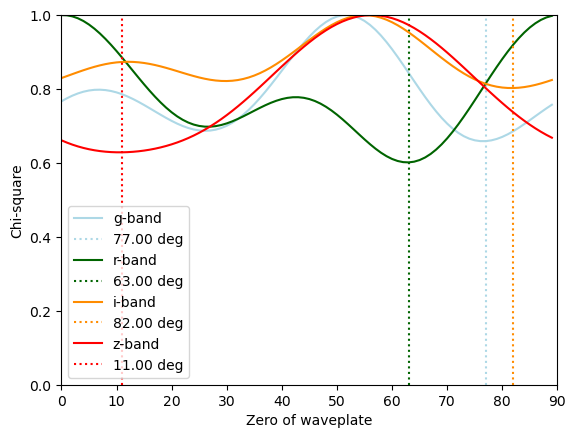

In [7]:
min_zeros = np.array([])
for ch in range(1,5) :        
    imin[ch-1] = np.argmin(chisqr[ch-1][mask])
    min_zero = zeros[mask][imin[ch-1]]
    min_zeros = np.append(min_zeros,min_zero) 
    maxchi2 = np.max(chisqr[ch-1])
    plt.plot(zeros,chisqr[ch-1]/maxchi2,color=colors[ch-1],label="{}-band".format(bands[ch-1]))
    plt.vlines(min_zero, 0, 1.0, ls=":", color=colors[ch-1], label="{:.2f} deg".format(min_zero))

plt.xlim(0,90)
plt.ylim(0,1)
plt.xlabel("Zero of waveplate")
plt.ylabel("Chi-square")
plt.legend()
plt.show()     

### Calculate mean value and uncertainty  :

In [8]:
final_zero = ufloat(np.mean(min_zeros), np.std(min_zeros))
print("{} deg".format(final_zero))

58+/-28 deg
